#  INT303 Big Data Analytics


##  CW2: Predicting Healthcare Employee Attrition

**Name:** Rui Wang <br>
**ID number:** 2033922 <br>

In [1]:
# Data and stats packages
import pandas as pd
import numpy as np

# Visulization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Pre-processing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas.api.types import CategoricalDtype
# Modeling
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# NEW PACKAGES
from time import time
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Other packages
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('./data/train.csv')
train.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1446447,35,No,Non-Travel,1225,Maternity,2,4,Life Sciences,1,4,Female,61,3,2,Nurse,1,Divorced,5093,4761,2,Y,No,11,3,1,80,1,16,2,4,1,0,0,0
1,1252790,37,No,Travel_Rarely,674,Maternity,13,3,Medical,1,1,Male,47,3,2,Nurse,4,Married,4285,3031,1,Y,No,17,3,1,80,0,10,2,3,10,8,3,7
2,1246982,49,No,Travel_Frequently,1475,Maternity,28,2,Life Sciences,1,1,Male,97,2,2,Nurse,1,Single,4284,22710,3,Y,No,20,4,1,80,0,20,2,3,4,3,1,3
3,1824855,50,No,Travel_Rarely,1207,Maternity,28,1,Medical,1,4,Male,74,4,1,Nurse,3,Married,3221,3297,1,Y,Yes,11,3,3,80,3,20,3,3,20,8,3,8
4,1359967,50,No,Travel_Rarely,939,Maternity,24,3,Life Sciences,1,4,Male,95,3,4,Therapist,3,Married,13973,4161,3,Y,Yes,18,3,4,80,1,22,2,3,12,11,1,5


# Part 1. Preprocessing
# 1. Data description

In [3]:
display(train.describe(exclude='O'))
display(train.describe(include='O'))

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1257.0,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.0,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,1.454788e+06,36.727128,810.591090,9.345267,2.953063,1.0,2.712013,65.405728,2.729515,2.058870,2.731106,6455.472554,14230.982498,2.565632,15.237072,3.151949,2.708831,80.0,0.789976,11.229912,2.778839,2.758154,7.098648,4.247414,2.136834,4.162291
std,2.504427e+05,9.003954,402.725662,8.281096,1.026803,0.0,1.095644,19.870702,0.719405,1.104292,1.099042,4675.751091,7173.032409,2.420197,3.625739,0.359114,1.091160,0.0,0.842990,7.746201,1.311548,0.700591,6.120458,3.587404,3.141116,3.542159
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.233733e+06,30.000000,472.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2956.000000,7791.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.461105e+06,35.000000,806.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4883.000000,14284.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.665956e+06,42.000000,1168.000000,15.000000,4.000000,1.0,4.000000,82.000000,3.000000,3.000000,4.000000,7978.000000,20392.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1257,1257,1257,1257,1257,1257,1257,1257,1257
unique,2,3,3,6,2,5,3,1,2
top,No,Travel_Rarely,Maternity,Life Sciences,Male,Nurse,Married,Y,No
freq,1105,885,602,510,745,622,569,1257,899


In [4]:
display(train.shape)
display(train.columns)
display(train.dtypes)

(1257, 35)

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

# 2. Data Visualization

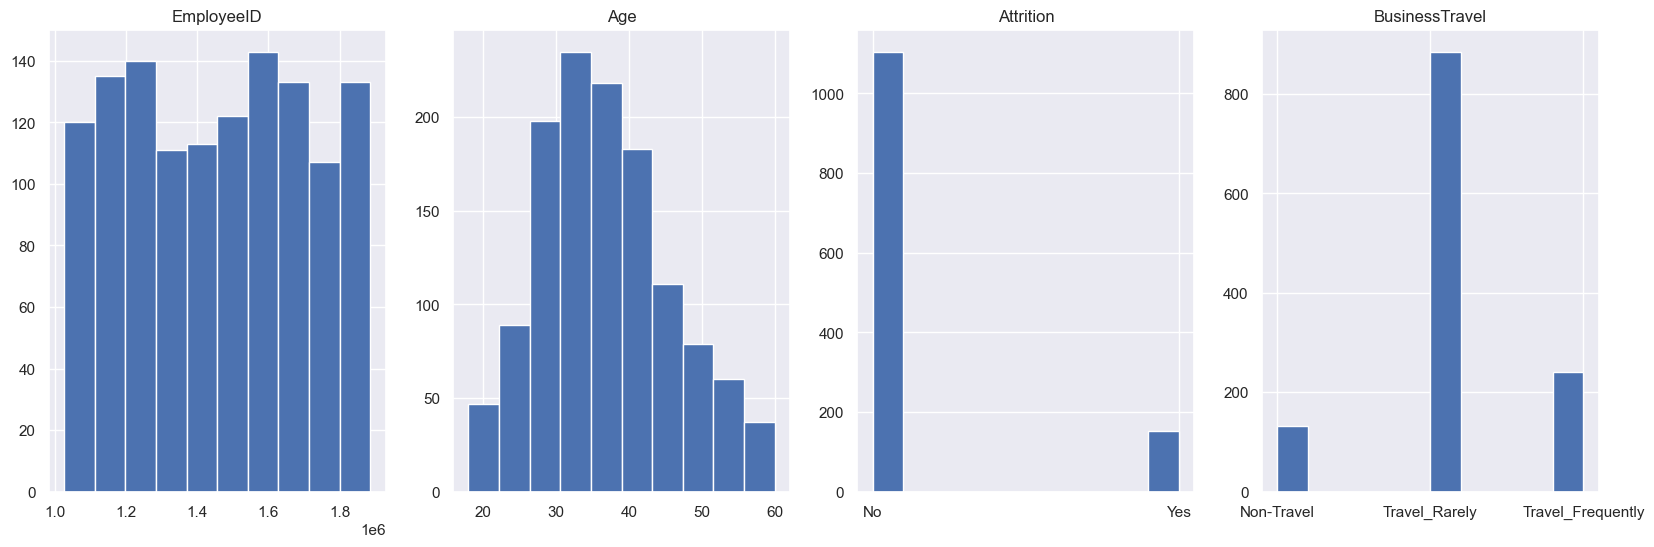

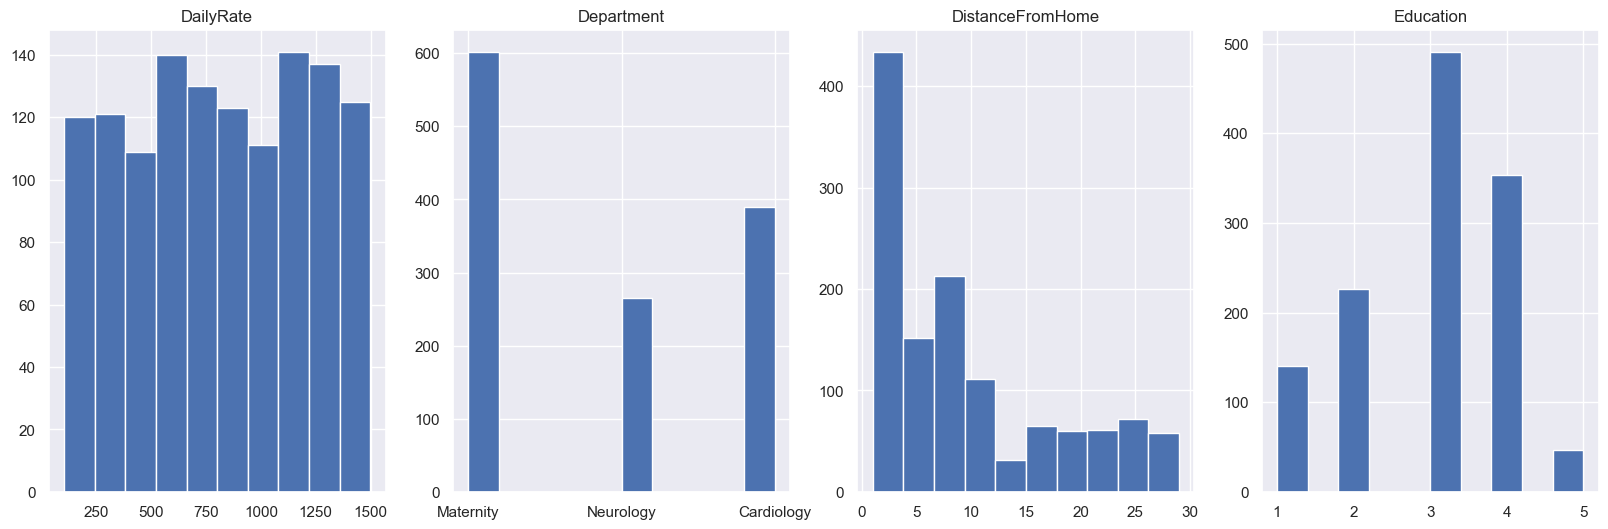

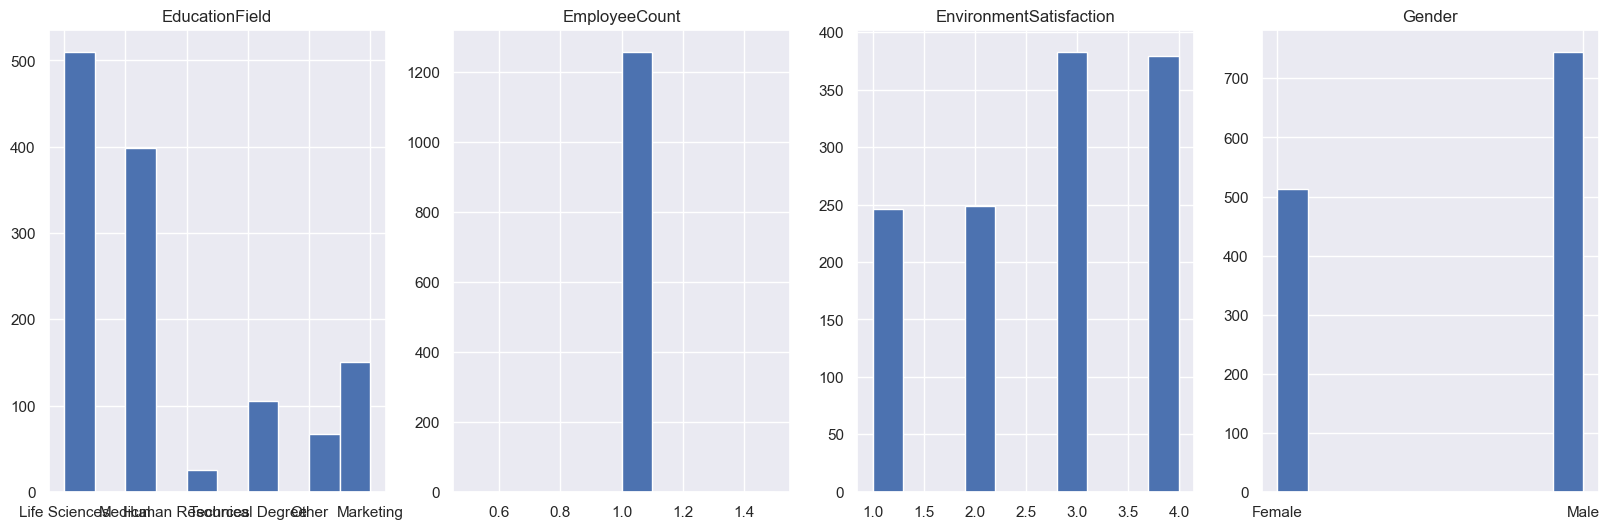

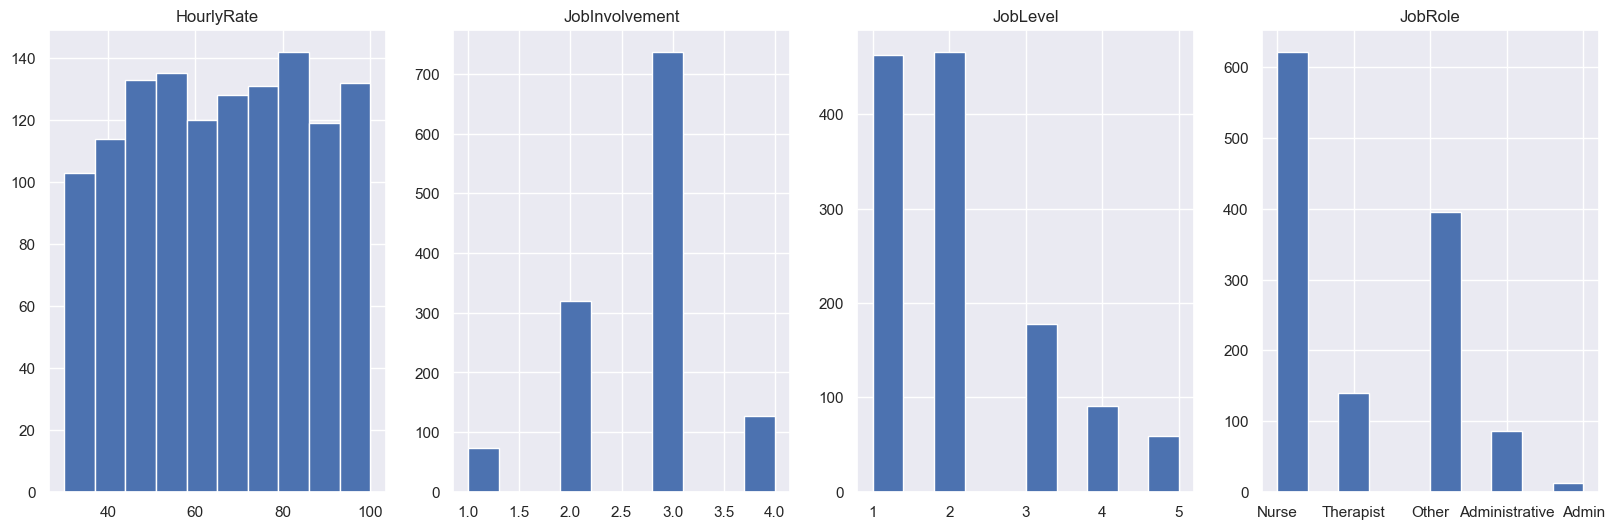

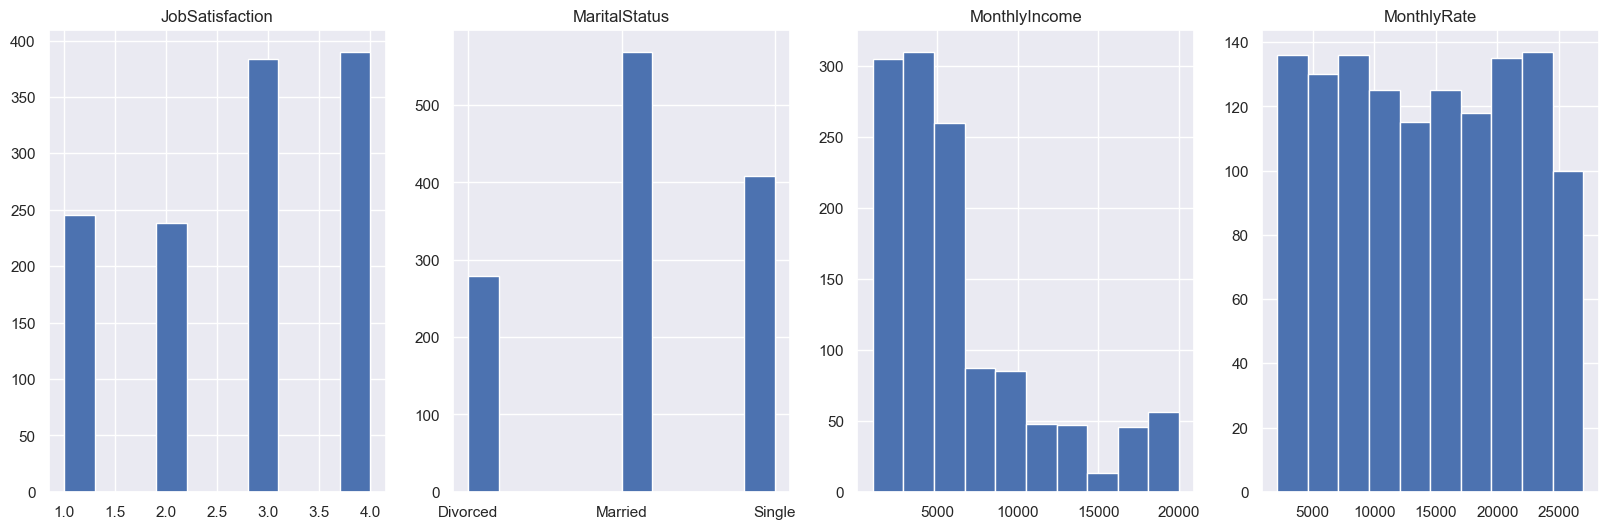

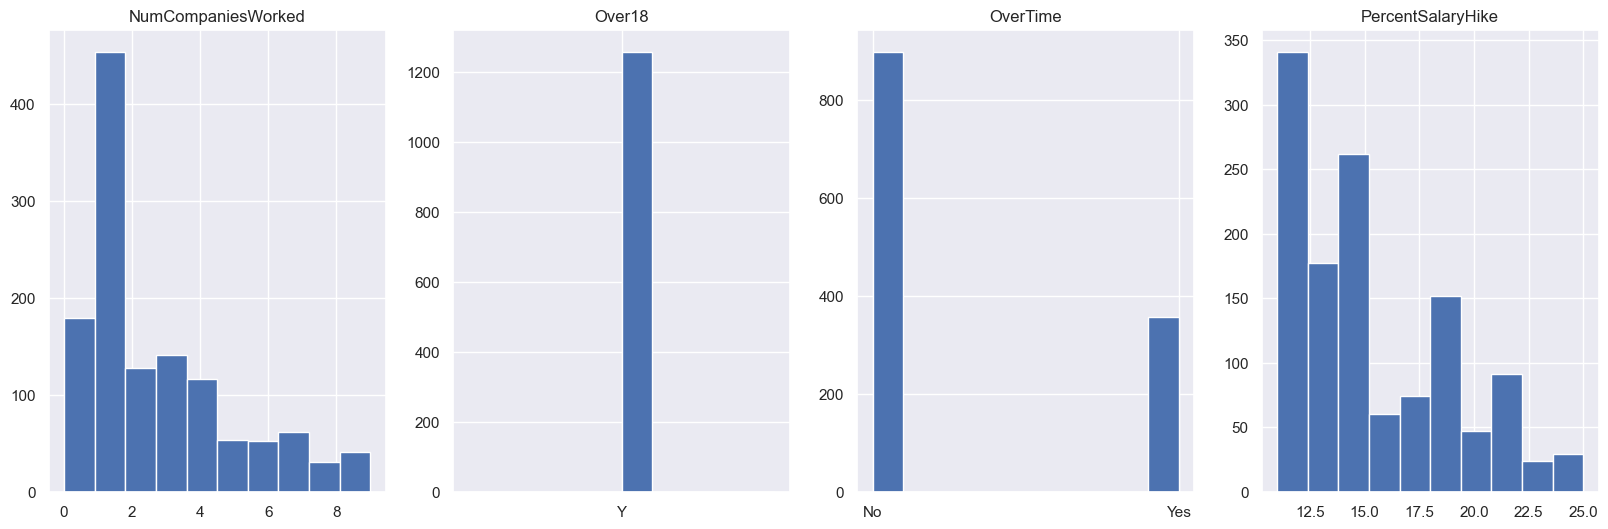

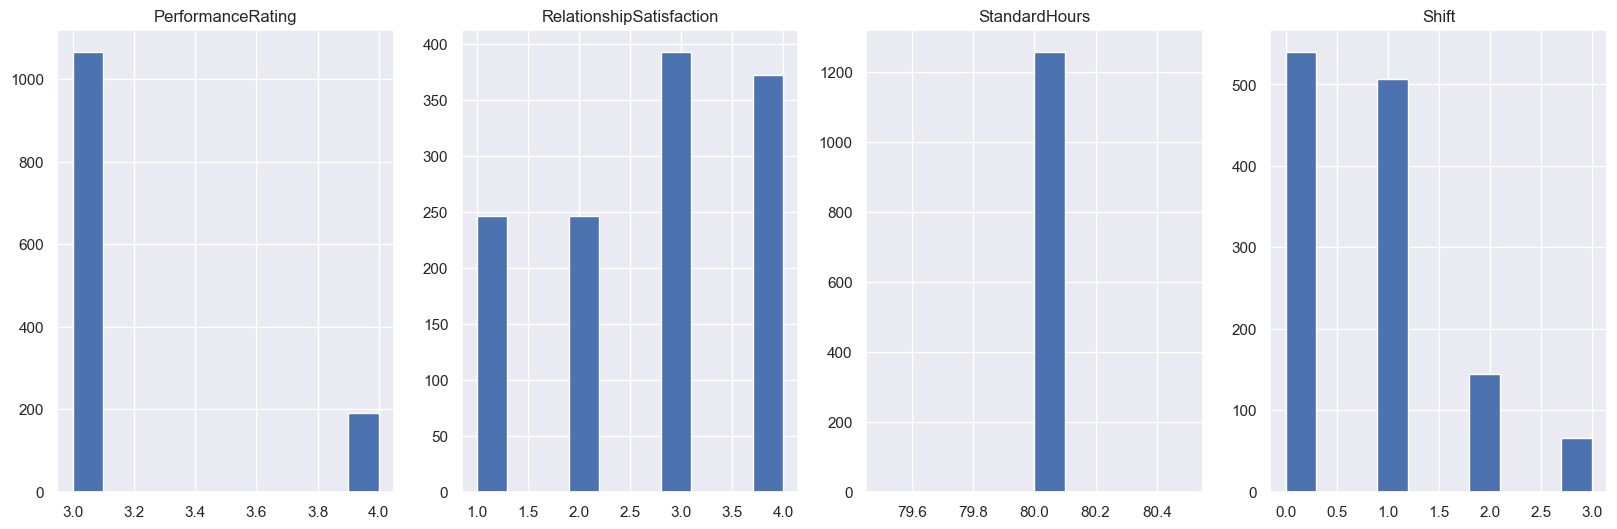

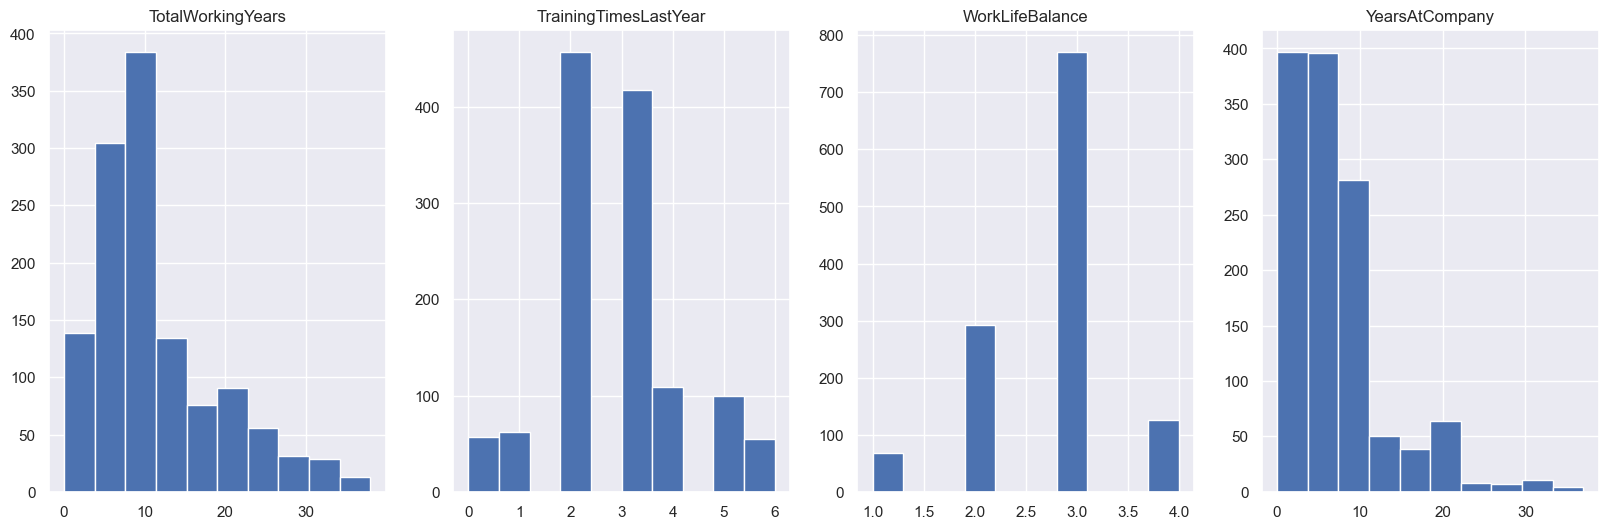

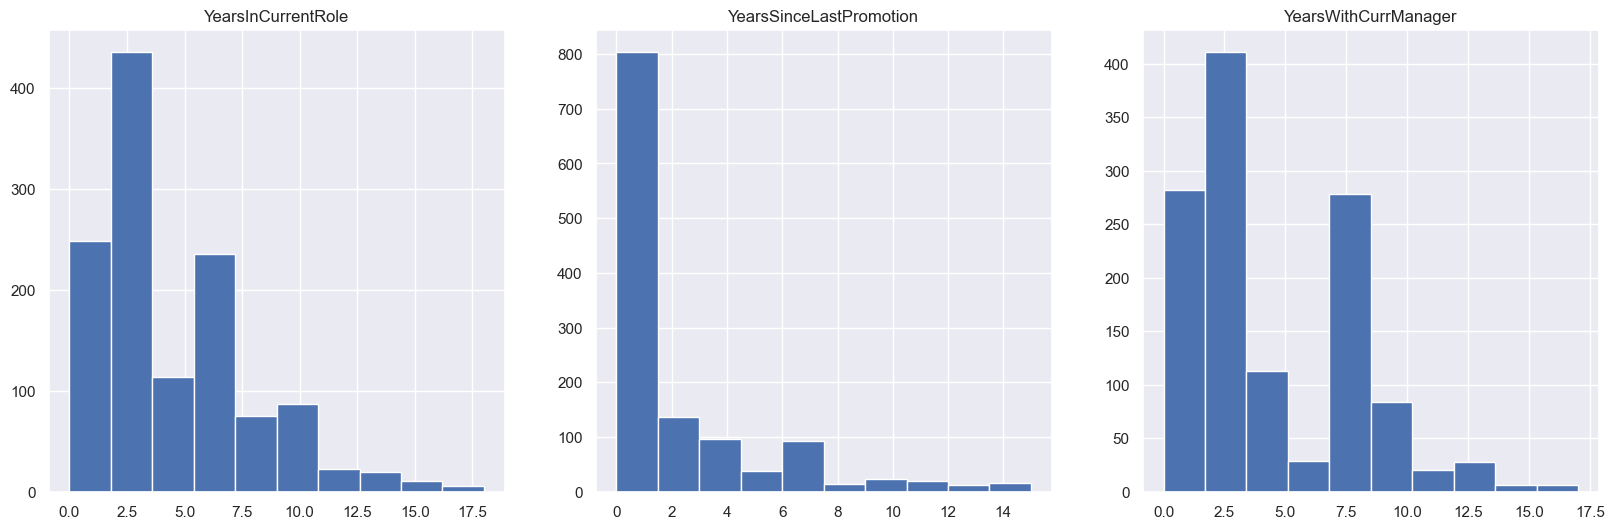

In [5]:
def plot_single_row(nb=0):
    size = 4 if nb < 32 else 3
    fig, axes = plt.subplots(1, size, figsize=(20,6))

    for i in range(size):
        axes[i].hist(train.iloc[:,i+nb])
        axes[i].set_title(train.columns[i+nb])
    
for k in range(0,train.shape[1],4):
    plot_single_row(k)

# 3. Data cleaning and reduction
### Because there are no missing value, so don't need to clean, only Data reducation

In [6]:
# 1. EmployeeCount, StandardHours, Over18 should be removed as they only have one value
# 2. EmployeeID is not useful for modelling
remove_attr_1 = ['EmployeeCount','StandardHours','Over18','EmployeeID']
train = train.drop(remove_attr_1, axis=1)

In [7]:
display(train.head())
display(train.shape)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,No,Non-Travel,1225,Maternity,2,4,Life Sciences,4,Female,61,3,2,Nurse,1,Divorced,5093,4761,2,No,11,3,1,1,16,2,4,1,0,0,0
1,37,No,Travel_Rarely,674,Maternity,13,3,Medical,1,Male,47,3,2,Nurse,4,Married,4285,3031,1,No,17,3,1,0,10,2,3,10,8,3,7
2,49,No,Travel_Frequently,1475,Maternity,28,2,Life Sciences,1,Male,97,2,2,Nurse,1,Single,4284,22710,3,No,20,4,1,0,20,2,3,4,3,1,3
3,50,No,Travel_Rarely,1207,Maternity,28,1,Medical,4,Male,74,4,1,Nurse,3,Married,3221,3297,1,Yes,11,3,3,3,20,3,3,20,8,3,8
4,50,No,Travel_Rarely,939,Maternity,24,3,Life Sciences,4,Male,95,3,4,Therapist,3,Married,13973,4161,3,Yes,18,3,4,1,22,2,3,12,11,1,5


(1257, 31)

# 4. Data Discretization (XGBoost needn't normalization)

In [8]:
train_vars = ['Attrition','BusinessTravel', 'Department','EducationField', 'Gender', 'JobRole','MaritalStatus', 'OverTime']

In [9]:
# convert into int type
le = LabelEncoder()
for var in train_vars:
    train[var] = le.fit_transform(train[var]).astype(np.int64)

# OneHotEncoder
# enc = OneHotEncoder()
# for var in train_vars:
#     train[var] = enc.fit_transform(train[var])

In [10]:
# save as category type
train_type = CategoricalDtype(ordered=False)
for var in train_vars:
    train[var] = train[var].astype(train_type)

In [11]:
display(train.head())
display(train.dtypes)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,0,0,1225,1,2,4,1,4,0,61,3,2,2,1,0,5093,4761,2,0,11,3,1,1,16,2,4,1,0,0,0
1,37,0,2,674,1,13,3,3,1,1,47,3,2,2,4,1,4285,3031,1,0,17,3,1,0,10,2,3,10,8,3,7
2,49,0,1,1475,1,28,2,1,1,1,97,2,2,2,1,2,4284,22710,3,0,20,4,1,0,20,2,3,4,3,1,3
3,50,0,2,1207,1,28,1,3,4,1,74,4,1,2,3,1,3221,3297,1,1,11,3,3,3,20,3,3,20,8,3,8
4,50,0,2,939,1,24,3,1,4,1,95,3,4,4,3,1,13973,4161,3,1,18,3,4,1,22,2,3,12,11,1,5


Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
Shift                          int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
Y

# 5. Feature extraction

In [12]:
feature_selected = np.abs(train.corr()['Attrition'].drop('Attrition')).sort_values(ascending = False)[0:12].keys()

Pape_49 remain 15 attributes : `Overtime, StockOptionLevel, JobLevel, MaritalStatus, YearsAtCompany, MonthlyIncome, YearsWithCurrManager, TotalWorkingYears, BusinessTravel, Age, YearsInCurrent Role, JobRole, JobInvolvement, EnvironmenSatisfaction, and WorkLifeBalance.`


Pape_Predicting Employee Attrition Using Machine Learning Approaches choose 12 attributes: `Age, Eucation, jobLevel, Monthlyincome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager`


The both they use attributes are (7 attributes): `JobLevel, YearsAtCompany, MonthlyIncome, YearsWithCurrManager, TotalWorkingYears, Age, YearsInCurrentRole`


Ranked top 12 attributes are: `OverTime, Age, TotalWorkingYears, JobLevel, YearsInCurrentRole, YearsAtCompany, YearsWithCurrManager, MonthlyIncome, JobInvolvement, MaritalStatus, Shift, DistanceFromHome`

In [13]:
display(train[feature_selected])
# train = train[feature_selected]

,OverTime,Age,TotalWorkingYears,JobLevel,YearsInCurrentRole,YearsAtCompany,YearsWithCurrManager,MonthlyIncome,JobInvolvement,MaritalStatus,Shift,DistanceFromHome
0,0,35,16,2,0,1,0,5093,3,0,1,2
1,0,37,10,2,8,10,7,4285,3,1,0,13
2,0,49,20,2,3,4,3,4284,2,2,0,28
3,1,50,20,1,8,20,8,3221,4,1,3,28
4,1,50,22,4,11,12,5,13973,3,1,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0,30,12,1,8,12,7,3748,3,1,0,1
1253,1,28,3,1,1,3,2,2703,2,0,1,6
1254,1,26,8,1,5,8,2,2875,3,2,0,4
1255,0,25,6,1,2,3,2,4400,2,1,0,9


In [14]:
display(train.head())
display(train.dtypes)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,0,0,1225,1,2,4,1,4,0,61,3,2,2,1,0,5093,4761,2,0,11,3,1,1,16,2,4,1,0,0,0
1,37,0,2,674,1,13,3,3,1,1,47,3,2,2,4,1,4285,3031,1,0,17,3,1,0,10,2,3,10,8,3,7
2,49,0,1,1475,1,28,2,1,1,1,97,2,2,2,1,2,4284,22710,3,0,20,4,1,0,20,2,3,4,3,1,3
3,50,0,2,1207,1,28,1,3,4,1,74,4,1,2,3,1,3221,3297,1,1,11,3,3,3,20,3,3,20,8,3,8
4,50,0,2,939,1,24,3,1,4,1,95,3,4,4,3,1,13973,4161,3,1,18,3,4,1,22,2,3,12,11,1,5


Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
Shift                          int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
Y

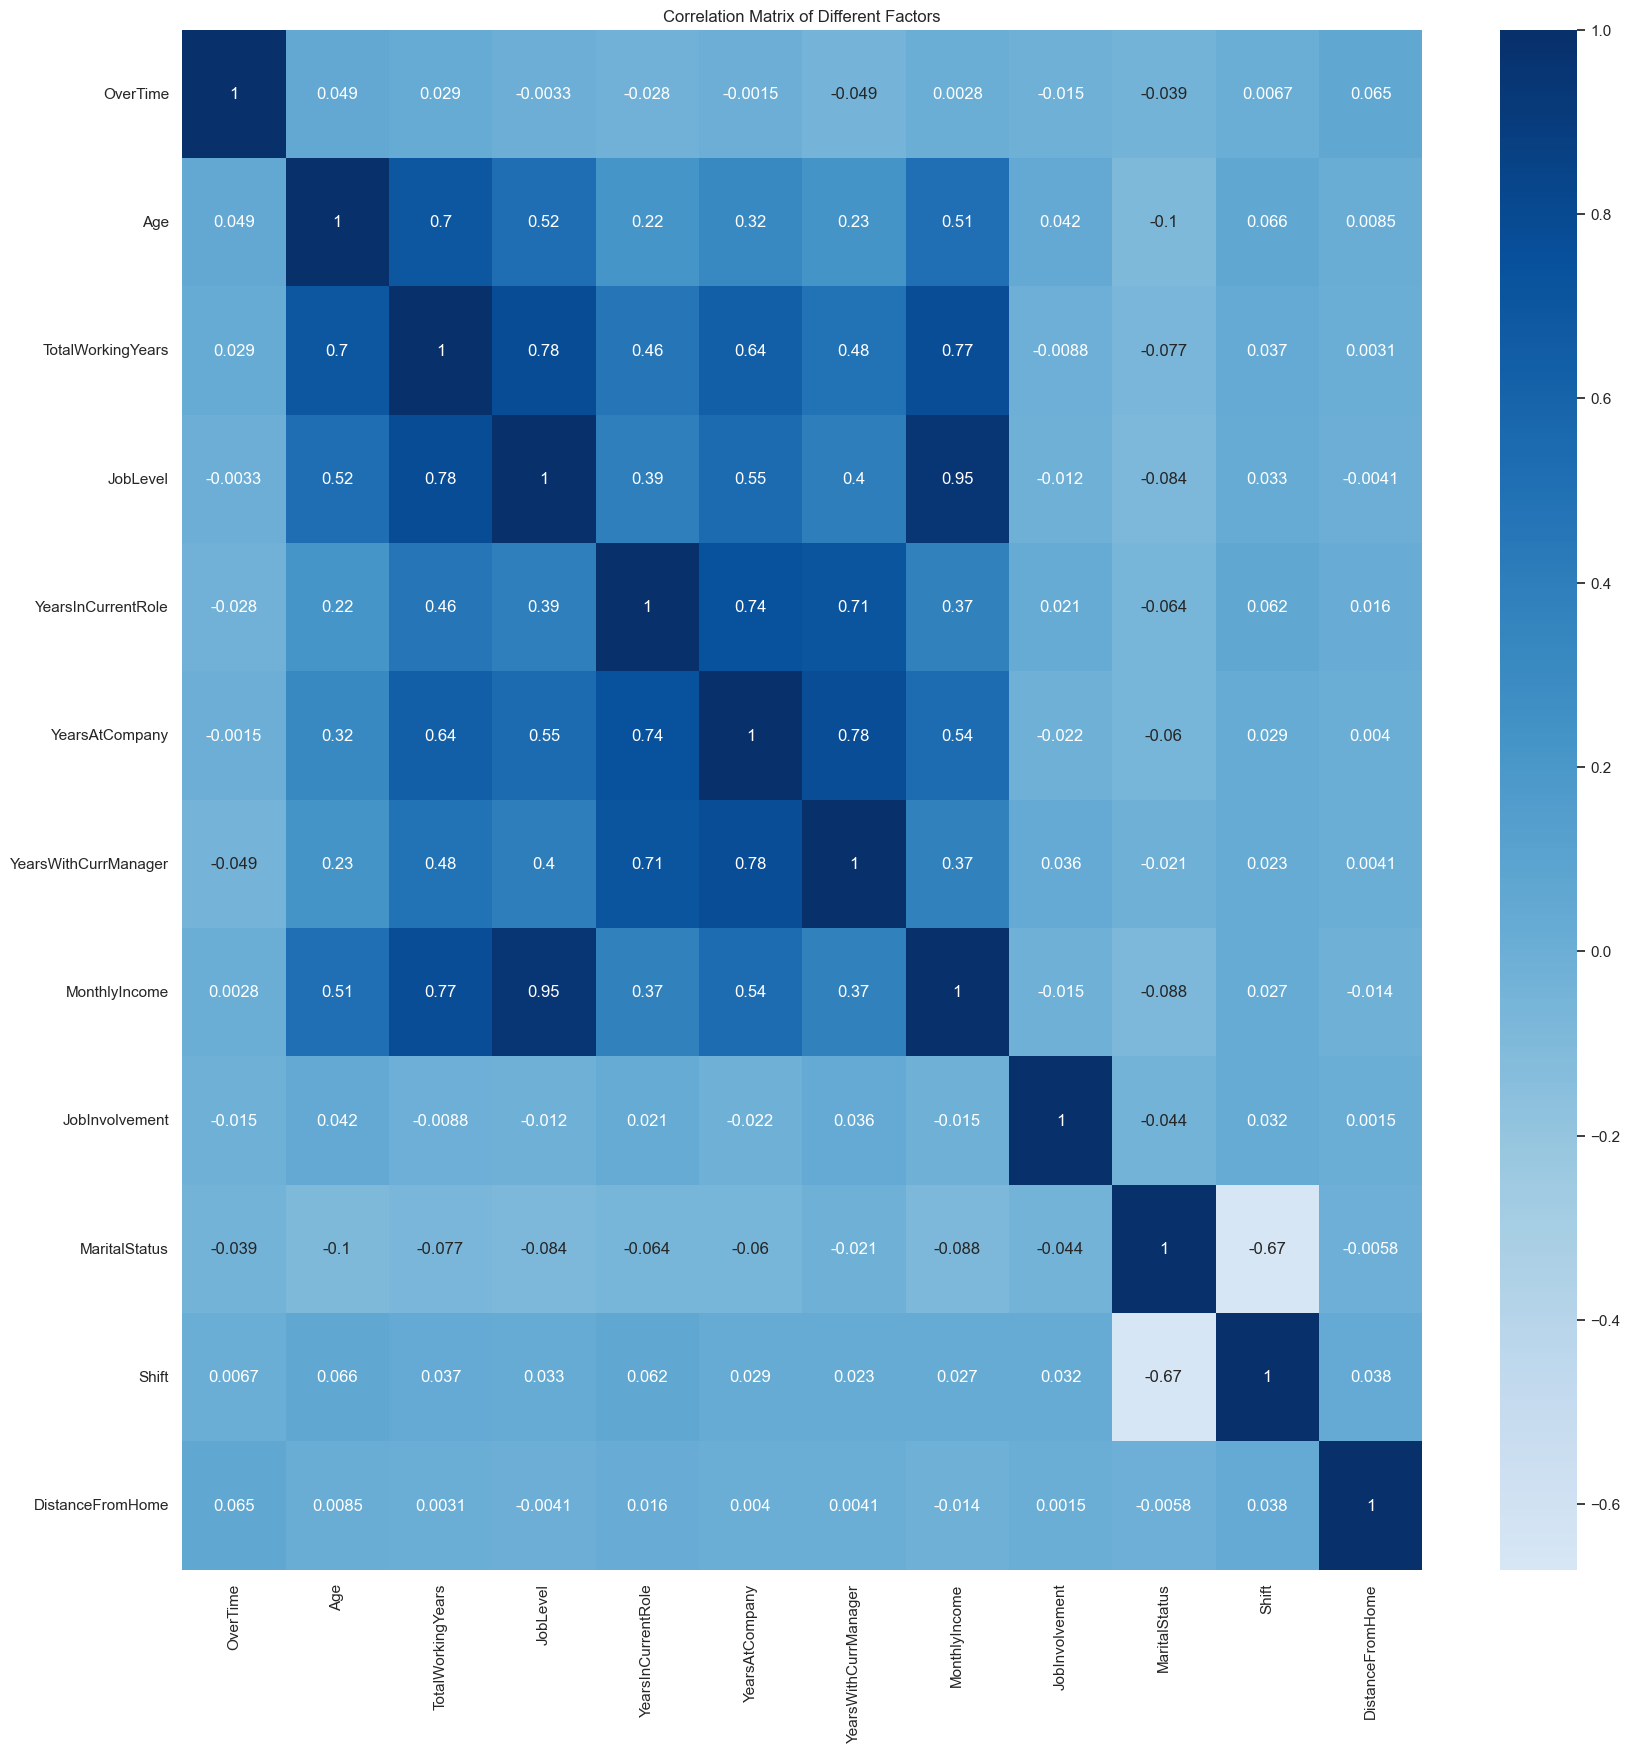

In [15]:
# heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(train[feature_selected].corr(),
            xticklabels=train[feature_selected].corr().columns, 
            yticklabels=train[feature_selected].columns,
            cmap='Blues',
            annot_kws={'size': 12},
            center=0,
            annot=True)
plt.title('Correlation Matrix of Different Factors');

# 6. Inbalanced Data (Data Resampling)
### The technique is: SMOTE

In [16]:
X = train.drop(["Attrition"], axis=1)
y = train["Attrition"]
Counter(y)

Counter({0: 1105, 1: 152})

In [17]:
sm = SMOTE(random_state=52) # sampling_strategy=0.8,
X_res, y_res = sm.fit_resample(X,y)
display(Counter(y_res))

Counter({0: 1105, 1: 1105})

Merge again

In [18]:
X_res["Attrition"] = y_res
train = X_res
display(train.head())
train.shape

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,35,0,1225,1,2,4,1,4,0,61,3,2,2,1,0,5093,4761,2,0,11,3,1,1,16,2,4,1,0,0,0,0
1,37,2,674,1,13,3,3,1,1,47,3,2,2,4,1,4285,3031,1,0,17,3,1,0,10,2,3,10,8,3,7,0
2,49,1,1475,1,28,2,1,1,1,97,2,2,2,1,2,4284,22710,3,0,20,4,1,0,20,2,3,4,3,1,3,0
3,50,2,1207,1,28,1,3,4,1,74,4,1,2,3,1,3221,3297,1,1,11,3,3,3,20,3,3,20,8,3,8,0
4,50,2,939,1,24,3,1,4,1,95,3,4,4,3,1,13973,4161,3,1,18,3,4,1,22,2,3,12,11,1,5,0


(2210, 31)

# 7. Split to 8:2

In [19]:
# split whole data set
train_data, test_data = train_test_split(train, test_size=0.20, random_state=52)

# then create the training feature set (x_train) and the response vector (y_train)
x_train, y_train = train_data.drop(["Attrition"], axis=1), train_data["Attrition"]
x_test, y_test = test_data.drop(["Attrition"], axis=1), test_data["Attrition"]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print(f'Training set = {train_data.shape[0]} \
({(100*train_data.shape[0]/train.shape[0]):.2f}% of the total dataset)')
print(f'Testing set  = {test_data.shape[0]} \
({(100*test_data.shape[0]/train.shape[0]):.2f}% of the total dataset)')

(1768, 30) (1768,) (442, 30) (442,)
Training set = 1768 (80.00% of the total dataset)
Testing set  = 442 (20.00% of the total dataset)


In [20]:
sum = 0
for i in y_train:
    sum += int(i)
pct_attrition_tr = 100*sum/len(y_train)
sum = 0
for i in y_test:
    sum += int(i)
pct_attrition_te = 100*sum/len(y_test)
                                                  
print(f"Percentage of leave in Training Set: {pct_attrition_tr:0.2f}%")
print(f"Percentage of leave in Testing Set: {pct_attrition_te:0.2f}%")

Percentage of leave in Training Set: 49.83%
Percentage of leave in Testing Set: 50.68%


# Part 2 Modelling
We fit here a single tree to our spam dataset and perform 10-fold cross validation on the training set. For ***each*** decision tree depth, we fit a tree and then compute the 10-fold CV scores. These scores are then averaged and compared across different depths. 

In [21]:
#Find optimal depth of trees
mean_CV_acc = {}
all_CV_acc = {}
tree_depth_start, tree_depth_end, steps = 3, 100, 5
for i in range(tree_depth_start, tree_depth_end + 1, steps):
    start = time()
    
    #declare tree model object
    model = DecisionTreeClassifier(max_depth=i)
    
    #get cv scores
    #to reduce the predictors, we use feature_selected 
    scores = cross_val_score(estimator=model, X=x_train[feature_selected], y=y_train, cv=10, n_jobs=-1)
    
    end = time()
    print(f"depth {i}: {end-start:0.2f}s")
    
    all_CV_acc[i] = scores
    mean_CV_acc[i] = scores.mean()

depth 3: 4.12s
depth 8: 0.08s
depth 13: 0.08s
depth 18: 0.08s
depth 23: 0.07s
depth 28: 0.07s
depth 33: 0.07s
depth 38: 0.08s
depth 43: 0.07s
depth 48: 0.08s
depth 53: 0.08s
depth 58: 0.08s
depth 63: 0.08s
depth 68: 0.09s
depth 73: 0.08s
depth 78: 0.07s
depth 83: 0.08s
depth 88: 0.07s
depth 93: 0.07s
depth 98: 0.08s


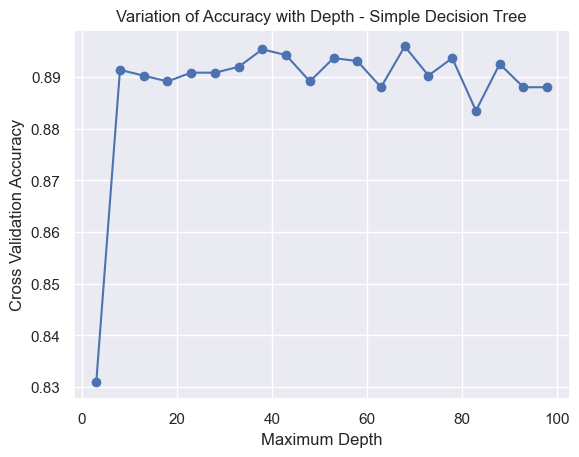

In [22]:
x = list(mean_CV_acc.keys())
y = list(mean_CV_acc.values())
#Plot
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.plot(x, y, 'b-', marker='o')
plt.show()

In [23]:
best_depth = sorted(mean_CV_acc, key=mean_CV_acc.get, reverse=True)[0]
print("The best depth was found to be:", best_depth)

The best depth was found to be: 68


In [24]:
#Evalaute the performance at the best depth
model_tree = DecisionTreeClassifier(max_depth=best_depth)
model_tree.fit(x_train, y_train)

#Check Accuracy of Spam Detection in Train and Test Set
acc_trees_training = accuracy_score(y_train, model_tree.predict(x_train))
acc_trees_testing  = accuracy_score(y_test,  model_tree.predict(x_test))

print(f"Simple Decision Trees: Accuracy, Training Set: {acc_trees_training:0.2%}")
print(f"Simple Decision Trees: Accuracy, Testing Set: {acc_trees_testing:0.2%}")

Simple Decision Trees: Accuracy, Training Set: 99.83%
Simple Decision Trees: Accuracy, Testing Set: 88.46%


# GXBoost

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

### Parameter Optimization of GXBoost through Grid Search

In [26]:
print("Parameter Optimization：")
X,y=x_train,y_train
xgb_model = xgb.XGBClassifier(objective='binary:logistic',random_state=52,use_label_encoder=False,eval_metric=['logloss','auc','error'],enable_categorical=True)
param_dict = {'max_depth': [2,4,6],'n_estimators': [100,200,300],'eta':[0.1,0.2,0.3],'min_child_weigh':[0.1,0.3,0.5]}
clf = GridSearchCV(xgb_model, param_dict, verbose=1)
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)

Parameter Optimization：
Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.962097277572382
{'eta': 0.2, 'max_depth': 2, 'min_child_weigh': 0.1, 'n_estimators': 200}


### Repetition with optimized parameter

In [27]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                              n_estimators=200,
                              random_state=0,
                              eta=0.2,
                              max_depth=2,
                              use_label_encoder=False,
                              eval_metric=['logloss','auc','error'],
                              min_child_weigh=0.1,
                              enable_categorical=True)

xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.2,
              eval_metric=['logloss', 'auc', 'error'], feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weigh=0.1, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, ...)

In [28]:
acc_trees_training = accuracy_score(y_train, xgb_model.predict(x_train))
acc_trees_testing  = accuracy_score(y_test,  xgb_model.predict(x_test))
print(f"Simple Decision Trees: Accuracy, Training Set: {acc_trees_training:0.2%}")
print(f"Simple Decision Trees: Accuracy, Testing Set: {acc_trees_testing:0.2%}")

Simple Decision Trees: Accuracy, Training Set: 99.32%
Simple Decision Trees: Accuracy, Testing Set: 94.12%


In [29]:
predictions = xgb_model.predict(x_test)
actuals = y_test

pd.crosstab(index    = actuals, 
            columns  = predictions, 
            rownames = ['Actual'],
            colnames = ['Predicted'],
            margins  = True)

Predicted,0,1,All
Actual,,,
0,199,19,218
1,7,217,224
All,206,236,442


# Predict the test.csv and save the answer

In [30]:
final_test = pd.read_csv('./data/test.csv')
display(final_test.head())
final_test.shape

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,NaN,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1060315,37,NaN,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
2,1196281,29,NaN,Travel_Rarely,153,Maternity,15,2,Life Sciences,1,4,Female,49,2,2,Nurse,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8
3,1080660,34,NaN,Travel_Rarely,1346,Maternity,19,2,Medical,1,2,Male,93,3,1,Nurse,4,Divorced,2661,8758,0,Y,No,11,3,3,80,1,3,2,3,2,2,1,2
4,1262683,22,NaN,Non-Travel,1123,Maternity,16,2,Medical,1,4,Male,96,4,1,Nurse,4,Divorced,2935,7324,1,Y,Yes,13,3,2,80,2,1,2,2,1,0,0,0


(419, 35)

### Drop `EmployeeCount','StandardHours','Over18','EmployeeID`

In [31]:
dropped_final_test = final_test.drop(remove_attr_1, axis=1)

In [32]:
display(dropped_final_test.head())
dropped_final_test.shape

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,NaN,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,37,NaN,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
2,29,NaN,Travel_Rarely,153,Maternity,15,2,Life Sciences,4,Female,49,2,2,Nurse,3,Single,4193,12682,0,Yes,12,3,4,0,10,3,3,9,5,0,8
3,34,NaN,Travel_Rarely,1346,Maternity,19,2,Medical,2,Male,93,3,1,Nurse,4,Divorced,2661,8758,0,No,11,3,3,1,3,2,3,2,2,1,2
4,22,NaN,Non-Travel,1123,Maternity,16,2,Medical,4,Male,96,4,1,Nurse,4,Divorced,2935,7324,1,Yes,13,3,2,2,1,2,2,1,0,0,0


(419, 31)

### Category

In [33]:
# save as category type
train_type = CategoricalDtype(ordered=False)
for var in train_vars:
    dropped_final_test[var] = dropped_final_test[var].astype(train_type)

In [34]:
display(dropped_final_test.head())
display(dropped_final_test.dtypes)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,NaN,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,37,NaN,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
2,29,NaN,Travel_Rarely,153,Maternity,15,2,Life Sciences,4,Female,49,2,2,Nurse,3,Single,4193,12682,0,Yes,12,3,4,0,10,3,3,9,5,0,8
3,34,NaN,Travel_Rarely,1346,Maternity,19,2,Medical,2,Male,93,3,1,Nurse,4,Divorced,2661,8758,0,No,11,3,3,1,3,2,3,2,2,1,2
4,22,NaN,Non-Travel,1123,Maternity,16,2,Medical,4,Male,96,4,1,Nurse,4,Divorced,2935,7324,1,Yes,13,3,2,2,1,2,2,1,0,0,0


Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
Shift                          int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
Y

### Split it into the test set

In [35]:
x_new_test = dropped_final_test.drop(["Attrition"],axis=1)

In [36]:
new_predictions = xgb_model.predict(x_new_test)

In [37]:
display(new_predictions)
display(Counter(new_predictions))

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

Counter({0: 374, 1: 45})

In [38]:
save_dict = {
    'EmployeeID': list(final_test["EmployeeID"]),
    'Attrition': list(new_predictions)
}
save_submission = pd.DataFrame(save_dict)

In [39]:
display(save_submission.head())
display(save_submission.shape)
display(save_submission.dtypes)

,EmployeeID,Attrition
0,1313919,0
1,1060315,1
2,1196281,0
3,1080660,0
4,1262683,0


(419, 2)

EmployeeID    int64
Attrition     int32
dtype: object

In [40]:
Attrition_decoding = {
    0 : "No",
    1 : "Yes"
}
save_submission["Attrition"] = save_submission["Attrition"].map(Attrition_decoding)

In [41]:
display(save_submission.head())
display(save_submission.shape)
display(save_submission.dtypes)

,EmployeeID,Attrition
0,1313919,No
1,1060315,Yes
2,1196281,No
3,1080660,No
4,1262683,No


(419, 2)

EmployeeID     int64
Attrition     object
dtype: object

In [42]:
save_submission.to_csv('./output/submission.csv',index=False)

In [43]:
load_csv = pd.read_csv('./output/submission.csv')

In [44]:
load_csv.head()

,EmployeeID,Attrition
0,1313919,No
1,1060315,Yes
2,1196281,No
3,1080660,No
4,1262683,No
